In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Preparation

In [3]:
df = pd.read_csv("/content/IMDb Movies India.csv", encoding='latin-1')

In [ ]:
#Display the dataframe
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
#finding the null
df.isna().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [6]:
df.duplicated().sum()

6

In [28]:
#Handling null values
df.dropna(inplace=True)

In [29]:
#Handling duplicate values
df.drop_duplicates(inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     5659 non-null   float64
 1   Duration                 5659 non-null   object 
 2   Genre                    5659 non-null   object 
 3   Rating                   5659 non-null   float64
 4   Votes                    5659 non-null   object 
 5   Director                 5659 non-null   object 
 6   Actor 1                  5659 non-null   object 
 7   Actor 2                  5659 non-null   object 
 8   Actor 3                  5659 non-null   object 
 9   Genre_Average_Rating     5659 non-null   float64
 10  Director_Average_Rating  5659 non-null   float64
 11  Actor1_Average_Rating    5659 non-null   float64
 12  Actor2_Average_Rating    5659 non-null   float64
 13  Actor3_Average_Rating    5659 non-null   float64
dtypes: float64(7), object(7)
mem

In [7]:
#Shape of the DataFrame after handling missing and duplicate values
df.shape

(15509, 10)

In [31]:
df

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating
1,2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.352082,7.000000,6.850000,7.000000,7.000000
3,2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.722500,4.400000,5.420000,4.400000,4.450000
5,1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.224490,5.358824,4.788889,5.786667,5.846154
6,2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,6.820000,7.500000,5.356000,6.050000,6.500000
8,2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.463636,5.600000,5.600000,5.883333,5.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,2015.0,115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,6.352082,6.100000,6.725000,6.100000,5.850000
15494,2001.0,153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,6.852941,7.250000,4.157143,5.689873,5.954545
15503,1989.0,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,5.616067,5.885714,6.328571,5.800000,5.850000
15505,1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.468266,5.225000,5.481707,4.645455,5.617143


In [33]:
# Convert into the correct data types
# Convert 'Year' column to string before using .str accessor
df['Year'] = df['Year'].astype(str).str.replace(r'\(|\)', '', regex=True)
# If there are still non-numeric values, replace them with NaN
# and then fill NaNs with a suitable value (e.g., mean or median)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Year'].fillna(df['Year'].mean(), inplace=True)
df['Year'] = df['Year'].astype(int) # Convert to int after handling NaNs

# Convert 'Duration' column to string before using .str accessor
df['Duration'] = pd.to_numeric(df['Duration'].astype(str).str.replace(' min', ''))
# Check if 'Votes' column is already numeric, if not then convert
if not pd.api.types.is_numeric_dtype(df['Votes']):
    df['Votes'] = pd.to_numeric(df['Votes'].astype(str).str.replace(',', ''))

<ipython-input-33-8ce9e327b5c4>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna(df['Year'].mean(), inplace=True)


In [34]:
df.dtypes

,0
Year,int64
Duration,int64
Genre,object
Rating,float64
Votes,int64
Director,object
Actor 1,object
Actor 2,object
Actor 3,object
Genre_Average_Rating,float64


In [35]:
df

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.352082,7.000000,6.850000,7.000000,7.000000
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.722500,4.400000,5.420000,4.400000,4.450000
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.224490,5.358824,4.788889,5.786667,5.846154
6,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,6.820000,7.500000,5.356000,6.050000,6.500000
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.463636,5.600000,5.600000,5.883333,5.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,6.352082,6.100000,6.725000,6.100000,5.850000
15494,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,6.852941,7.250000,4.157143,5.689873,5.954545
15503,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,5.616067,5.885714,6.328571,5.800000,5.850000
15505,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.468266,5.225000,5.481707,4.645455,5.617143


Exploratory Data Analysis


In [36]:
# Descriptive Statistics for all columns
df.describe(include='all')

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating
count,5659.000000,5659.000000,5659,5659.000000,5659.000000,5659,5659,5659,5659,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000
unique,NaN,NaN,376,NaN,NaN,2431,1960,2321,2556,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Drama,NaN,NaN,David Dhawan,Amitabh Bachchan,Rekha,Pran,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,844,NaN,NaN,41,104,52,57,NaN,NaN,NaN,NaN,NaN
mean,1996.247570,133.439124,NaN,5.898533,2697.649585,NaN,NaN,NaN,NaN,5.844631,5.859297,5.853931,5.845092,5.845883
std,19.741839,25.319939,NaN,1.381165,13651.503584,NaN,NaN,NaN,NaN,0.565934,1.087086,1.017079,1.031253,1.047145
min,1931.000000,21.000000,NaN,1.100000,5.000000,NaN,NaN,NaN,NaN,2.400000,1.700000,1.400000,1.600000,1.700000
25%,1983.000000,119.000000,NaN,5.000000,30.000000,NaN,NaN,NaN,NaN,5.504930,5.193023,5.300000,5.229412,5.230435
50%,2002.000000,135.000000,NaN,6.100000,131.000000,NaN,NaN,NaN,NaN,5.787500,5.900000,5.913636,5.883333,5.900000
75%,2013.000000,150.000000,NaN,6.900000,922.500000,NaN,NaN,NaN,NaN,6.300000,6.600000,6.500000,6.476923,6.500000


Data Visualization

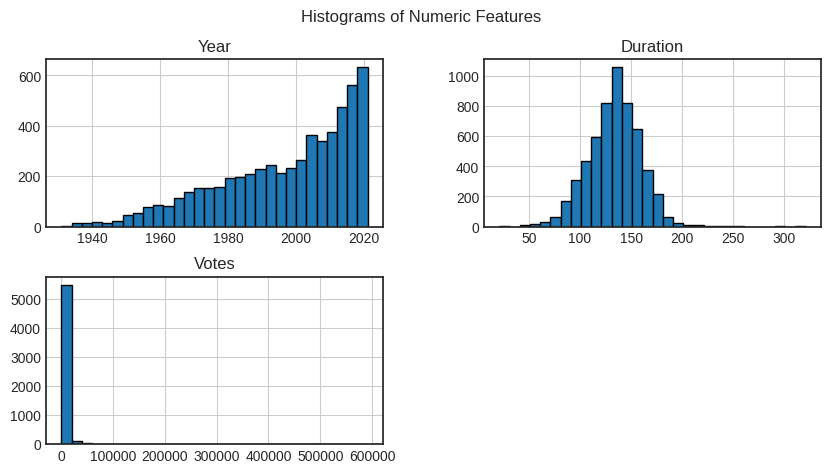

In [37]:
# Histogram for independent numeric features
plt.style.use('seaborn-v0_8-white')
df[['Year', 'Duration', 'Votes']].hist(bins=30, edgecolor='black',figsize=(10, 5))
plt.suptitle('Histograms of Numeric Features')
plt.show()

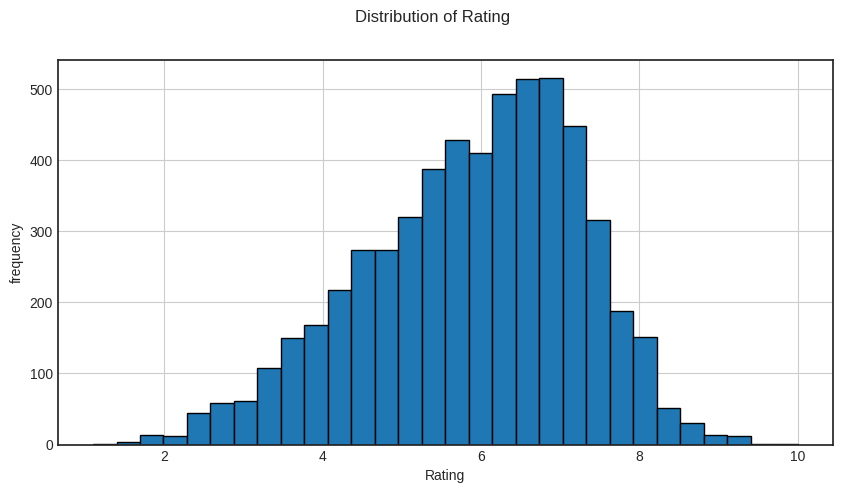

In [38]:
df['Rating'].hist(bins=30, edgecolor='black',figsize=(10, 5))
plt.suptitle('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('frequency')
plt.show()

<ipython-input-39-b4b3ea1f4c11>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_directors.values, y=top_10_directors.index,  palette='Dark2')


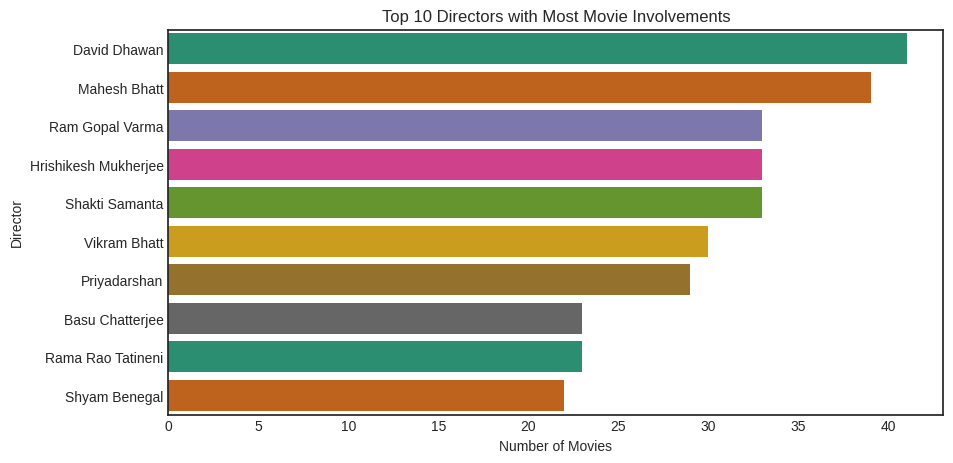

In [39]:
top_10_directors = df['Director'].value_counts(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_directors.values, y=top_10_directors.index,  palette='Dark2')
plt.title('Top 10 Directors with Most Movie Involvements')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()


<ipython-input-40-9893041ef5e6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.values, y=top_10_genres.index,  palette='muted')


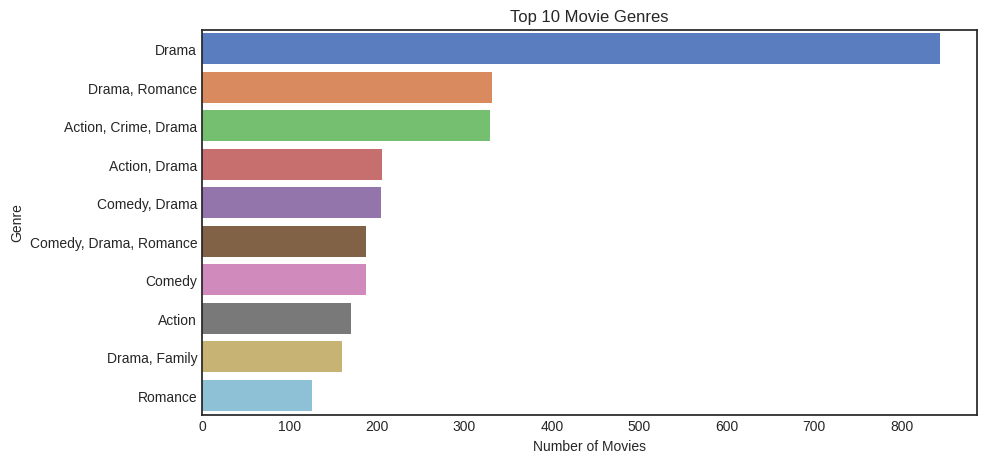

In [40]:
top_10_genres = df['Genre'].value_counts(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index,  palette='muted')
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

In [41]:
 #Top 10 Actors With Most Movie Involvements
# Combine the three actor columns into one Series
combined_actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']])

# Display the top 10 actors
top_10_actors = combined_actors.value_counts().head(10)
top_10_actors

,count
Mithun Chakraborty,160
Amitabh Bachchan,148
Dharmendra,146
Ashok Kumar,124
Akshay Kumar,120
Shashi Kapoor,117
Jeetendra,116
Sanjay Dutt,101
Rekha,92
Ajay Devgn,92


<ipython-input-42-124303712e65>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_actors.values, y=top_10_actors.index, palette='Dark2')


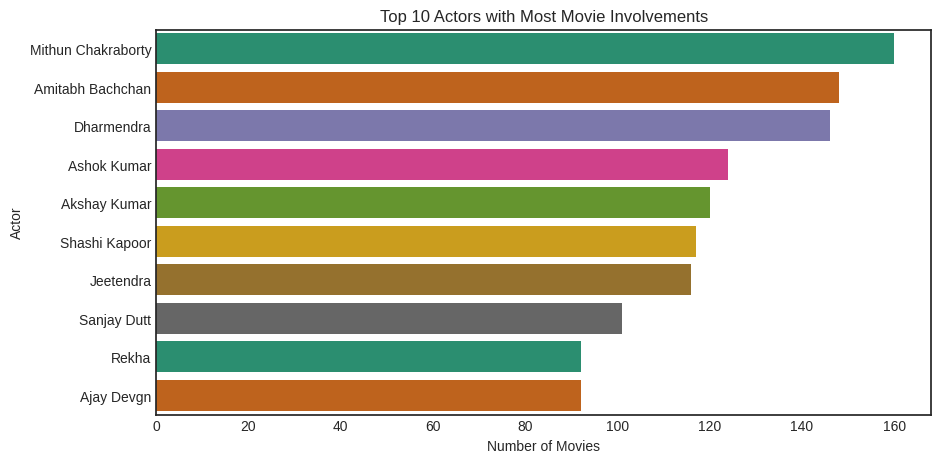

In [42]:
# Plotting the top 10 actors
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_actors.values, y=top_10_actors.index, palette='Dark2')
plt.title('Top 10 Actors with Most Movie Involvements')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()

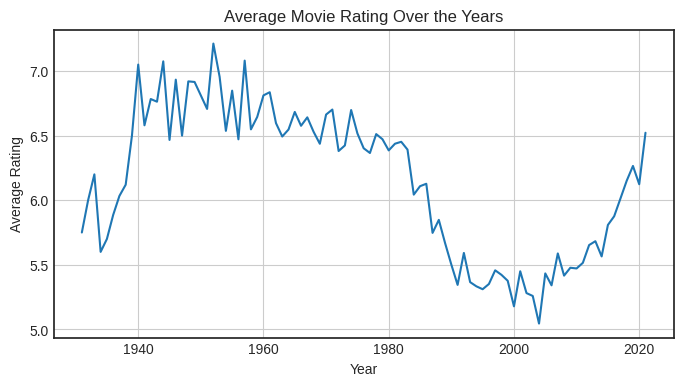

In [43]:
# Average Rating over these years

# Calculate the average rating for each year
average_rating_per_year = df.groupby('Year')['Rating'].mean().reset_index()
average_rating_per_year.columns = ['Year', 'Average Rating']

#Plot
plt.figure(figsize=(8, 4))
plt.plot(average_rating_per_year['Year'], average_rating_per_year['Average Rating'], linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating Over the Years')
plt.grid(True)
plt.show()

In [44]:
# High rated movie details
high_rating_movies = df[df['Rating'] > 8.5]
high_rating_movies

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating
967,2016,96,"Documentary, Thriller",8.7,1928,Khushboo Ranka,Vinay Shukla,Arvind Kejriwal,Saurabh Bhardwaj,8.250000,8.700000,8.700000,8.700000,8.700000
1314,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi,6.352082,9.300000,9.300000,9.300000,9.300000
1341,2018,127,Drama,8.8,5,Abdul Sattar,Sahil Akhtar,Himayat Ali,Aman Jain,6.352082,8.800000,8.800000,8.800000,8.800000
1432,2020,101,Drama,8.7,21,Rajat Kumar Chaturvedi,Arjun Chakrabarty,Trishala Idnani,Sarvagya Jain,6.352082,8.700000,8.700000,8.700000,8.700000
1469,2017,117,Drama,8.8,5,Vishal Mourya,Bharat Chawla,Nemi Chandra Jha,Moumita Nandi,6.352082,8.800000,8.800000,8.800000,8.800000
1709,2019,120,Comedy,8.8,23,Sanjay Puran Singh Chauhan,Narottam Bain,Aamir Bashir,Pawan Malhotra,5.703089,7.550000,8.800000,8.800000,7.057143
1729,2021,72,Family,9.3,29,Vishwa Bhanu,Vishwa Bhanu,Sangam Shukla,Vijay Thakur,6.225532,9.300000,9.300000,9.300000,9.300000
2093,1970,136,Drama,8.7,10,Babubhai Mistry,Niranjan Sharma,Shalini,Trilok Kapoor,6.352082,6.570833,8.700000,7.500000,7.275000
2437,2020,120,Thriller,8.6,38,Hemant N Mishra,Samiksha Bhatnagar,Rahul Chawla,Abhilash Dada,5.291667,6.800000,6.866667,8.600000,8.600000
2709,2016,134,Animation,8.6,656,Harry Baweja,Harman Baweja,Pawan Kalra,Om Puri,6.121212,4.833333,4.960000,8.600000,5.955172


In [68]:
# Group by Rating and get the count of movies which have higher than rating value 8.5
# Instead of 'Name', use another column that exists in the DataFrame
# like 'Director', 'Actor 1', etc. to count movies
rating_counts = high_rating_movies.groupby('Rating')['Director'].count().reset_index()
rating_counts.columns = ['Rating', 'Number of Movies']
rating_counts = rating_counts.sort_values(by='Rating', ascending=False)
rating_counts

,Rating,Number of Movies
10,10.0,1
9,9.7,1
8,9.4,3
7,9.3,7
6,9.2,2
5,9.1,4
4,9.0,5
3,8.9,5
2,8.8,6
1,8.7,8


Correlation Analysis

<Axes: >

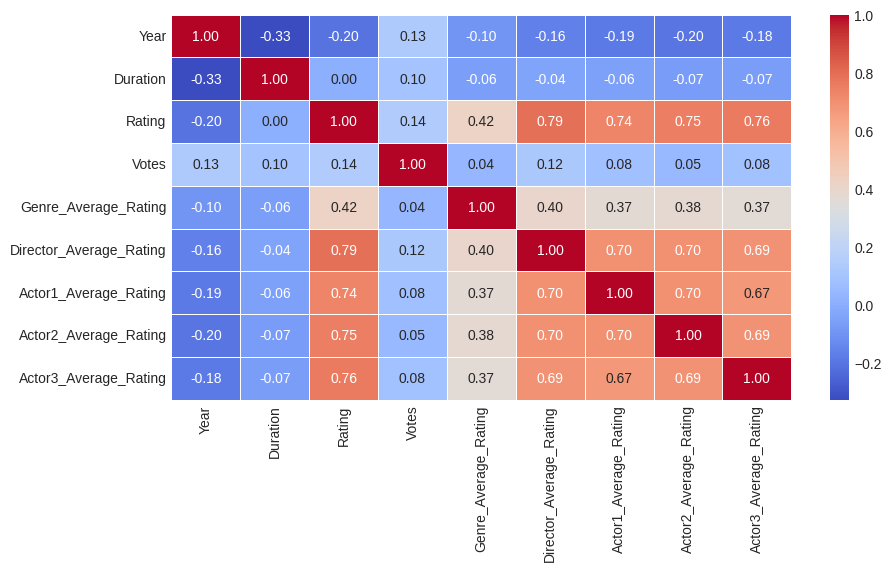

In [66]:
#Relationship between numeric variables
# Check if 'Name' column exists before dropping
if 'Name' in df.columns:
    new_df = df.drop(columns=['Name', 'Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'])
else:
    new_df = df.drop(columns=['Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'])

corr = new_df.corr()
plt.figure(figsize=(10, 5))

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)

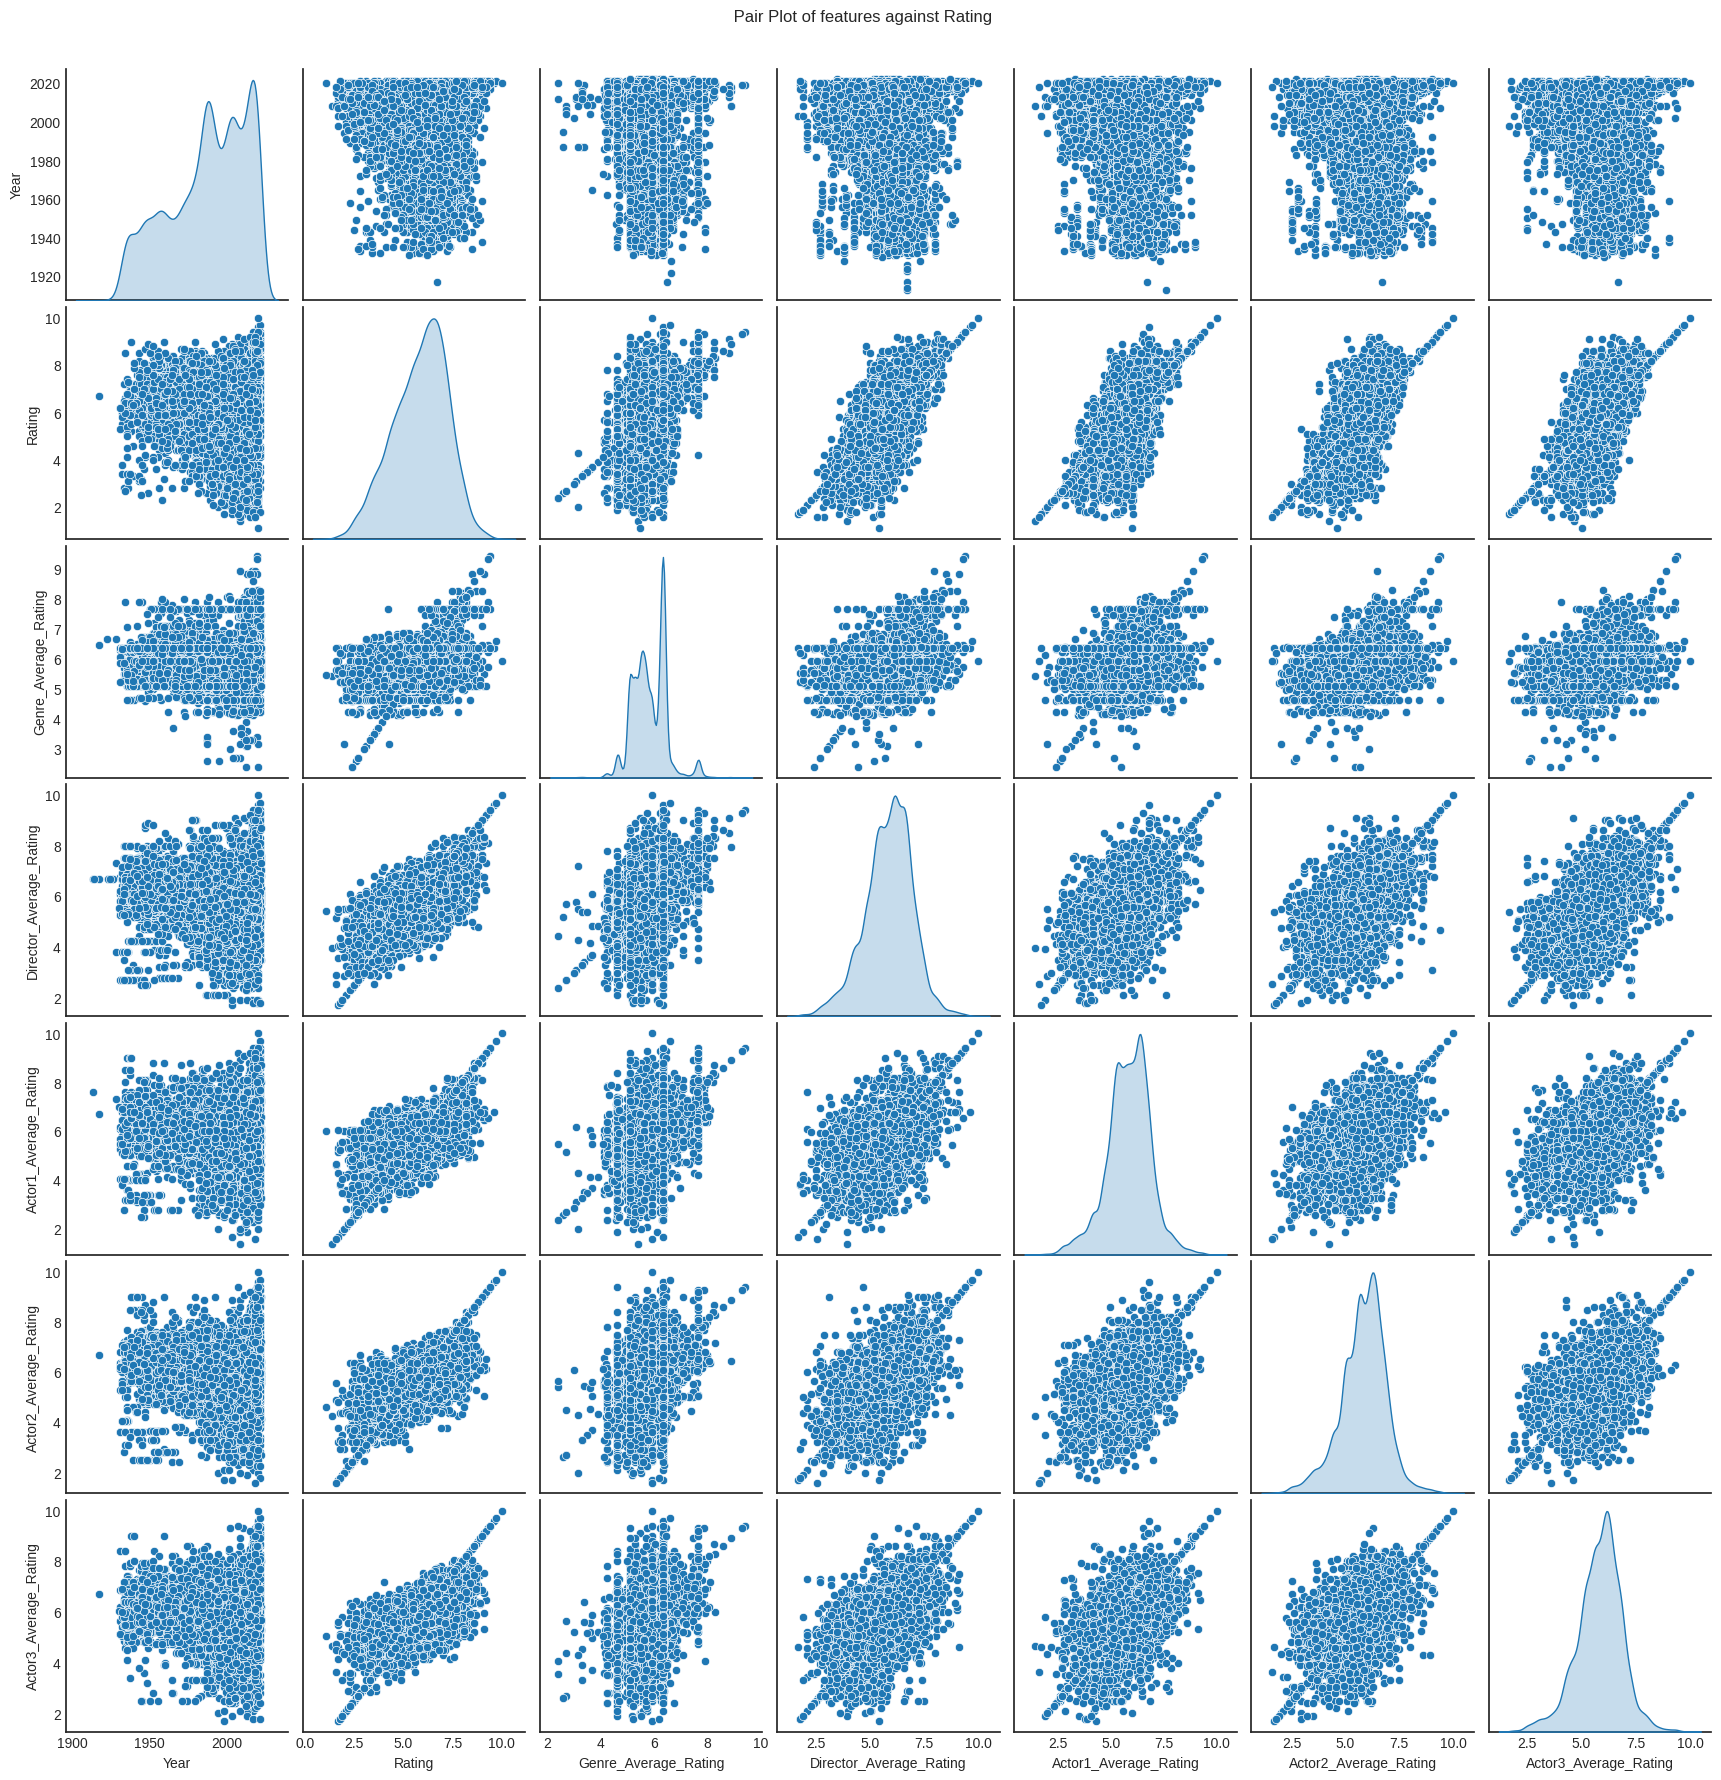

In [65]:
sns.pairplot(new_df,diag_kind='kde')
plt.suptitle(' Pair Plot of features against Rating', y=1.02)
plt.show()

Feature Engineering

In [21]:


# Drop the Name column
df= df.drop('Name',axis=1)

In [20]:
Genre_Average_Rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_Average_Rating'] =Genre_Average_Rating

Director_Average_Rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_Average_Rating'] =Director_Average_Rating

Actor1_Average_Rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_Average_Rating'] =Actor1_Average_Rating

Actor2_Average_Rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_Average_Rating'] =Actor2_Average_Rating

Actor3_Average_Rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_Average_Rating'] =Actor3_Average_Rating

df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating
0,,1987.012215,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,6.352082,5.700000,NaN,5.229412,NaN
1,#Gadhvi (He thought he was Gandhi),2019.000000,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.352082,7.000000,6.850000,7.000000,7.000000
2,#Homecoming,2021.000000,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,6.493103,NaN,7.000000,7.350000,NaN
3,#Yaaram,2019.000000,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.722500,4.400000,5.420000,4.400000,4.450000
4,...And Once Again,2010.000000,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,6.352082,6.333333,7.000000,5.742857,5.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988.000000,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,5.092566,4.075000,6.025532,3.700000,4.600000
15505,Zulmi,1999.000000,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.468266,5.225000,5.481707,4.645455,5.617143
15506,Zulmi Raj,2005.000000,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN,5.092566,NaN,NaN,NaN,NaN
15507,Zulmi Shikari,1988.000000,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN,5.092566,NaN,NaN,NaN,NaN


Data Splitting

In [51]:


#Split dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Define feature and target variables
x= df[['Year','Votes','Duration','Genre_Average_Rating','Director_Average_Rating','Actor1_Average_Rating','Actor2_Average_Rating','Actor3_Average_Rating']]
y=df['Rating']

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [64]:
train_data= x_train.join(y_train)
train_data

,Year,Votes,Duration,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating,Rating
2075,2018,84,107,5.722500,8.300000,8.300000,5.376923,6.200000,8.3
7897,2005,278,125,5.722500,5.350000,5.061538,4.470000,5.842857,3.4
14557,2017,45,100,5.703089,5.825000,6.800000,6.800000,6.800000,6.8
385,1970,211,177,6.377670,6.100000,6.376271,6.656000,5.936842,6.4
11927,2012,9,122,6.287500,4.600000,6.300000,4.600000,3.450000,4.6
...,...,...,...,...,...,...,...,...,...
7524,1988,181,156,5.468266,5.379412,5.742537,5.054839,4.350000,4.8
4507,1976,44,158,5.326966,6.483333,6.436800,6.470588,6.400000,7.0
14150,2016,22,140,5.291667,5.900000,5.900000,5.900000,5.900000,5.9
4281,1976,104,155,5.504930,5.600000,5.913636,6.198592,6.368421,5.6


Model Building

In [54]:
# Convert 'Year' column to numeric, handling errors
# ... (Previous code) ...

# Convert 'Year' column to string, remove parentheses, and convert to int
df['Year'] = df['Year'].astype(str).str.replace(r'\(|\)', '', regex=True).astype(int, errors='ignore')

# If there are still non-numeric values, replace them with NaN
# and then fill NaNs with a suitable value (e.g., mean or median)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Year'].fillna(df['Year'].mean(), inplace=True)

# ... (Rest of the code) ...

# Re-split the data after cleaning the 'Year' column
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
train_data = x_train.join(y_train)
x_train, y_train = train_data[['Year', 'Votes', 'Duration', 'Genre_Average_Rating', 'Director_Average_Rating', 'Actor1_Average_Rating', 'Actor2_Average_Rating', 'Actor3_Average_Rating']], train_data['Rating']

# ... (Model building code) ...

<ipython-input-54-9a3e85837618>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna(df['Year'].mean(), inplace=True)


In [55]:
# Convert 'Year' column to numeric, handling errors
df['Year'] = df['Year'].astype(str).str.replace(r'\(|\)', '', regex=True)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Year'].fillna(df['Year'].mean(), inplace=True)

# Re-split the data after cleaning the 'Year' column
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
train_data = x_train.join(y_train)

# Ensure x_train contains only numeric features
x_train = train_data[['Year', 'Votes', 'Duration', 'Genre_Average_Rating', 'Director_Average_Rating', 'Actor1_Average_Rating', 'Actor2_Average_Rating', 'Actor3_Average_Rating']]
# Ensure y_train contains the target variable
y_train = train_data['Rating']

# Continue with model building

<ipython-input-55-f7b1fe0d217f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna(df['Year'].mean(), inplace=True)


In [56]:
# Evaluating the model's performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression  # Import LinearRegression
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor

# Create and fit the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(x_test)

# Create and fit the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(x_test)

MSE_lr = mean_squared_error(y_test, y_pred_lr)
MAE_lr = mean_absolute_error(y_test, y_pred_lr)
R2_Score_lr = r2_score(y_test, y_pred_lr)

print('   Performance Evaluation for Linear Regression Model: ')
print('Mean squared error value is: ', MSE_lr)
print('Mean absolute error value is: ', MAE_lr)
print('R2 score value is: ', R2_Score_lr)

MSE_rf = mean_squared_error(y_test, y_pred_rf)
MAE_rf = mean_absolute_error(y_test, y_pred_rf)
R2_Score_rf = r2_score(y_test, y_pred_rf)

print('\n   Performance Evaluation for Random Forest Model: ')
print('Mean squared error value is: ', MSE_rf)
print('Mean absolute error value is: ', MAE_rf)
print('R2 score value is: ', R2_Score_rf)

   Performance Evaluation for Linear Regression Model: 
Mean squared error value is:  0.45765627073229226
Mean absolute error value is:  0.5054467768443934
R2 score value is:  0.7630434521725511

   Performance Evaluation for Random Forest Model: 
Mean squared error value is:  0.3599825874558302
Mean absolute error value is:  0.4144708480565371
R2 score value is:  0.8136150717108321


In [57]:
# Convert 'Year' column to numeric, handling errors
df['Year'] = df['Year'].astype(str).str.replace(r'\(|\)', '', regex=True)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Year'].fillna(df['Year'].mean(), inplace=True)

# Re-split the data after cleaning the 'Year' column
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
train_data = x_train.join(y_train)

# Ensure x_train contains only numeric features
x_train = train_data[['Year', 'Votes', 'Duration', 'Genre_Average_Rating', 'Director_Average_Rating', 'Actor1_Average_Rating', 'Actor2_Average_Rating', 'Actor3_Average_Rating']]
# Ensure y_train contains the target variable
y_train = train_data['Rating']


<ipython-input-57-13e210f7865f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna(df['Year'].mean(), inplace=True)


<ipython-input-58-796b40cea111>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna(df['Year'].mean(), inplace=True)


   Performance Evaluation for Linear Regression Model: 
Mean squared error value is:  0.48084837460088575
Mean absolute error value is:  0.5092415117052943
R2 score value is:  0.7591694944787991

   Performance Evaluation for Random Forest Model: 
Mean squared error value is:  0.3751076793286219
Mean absolute error value is:  0.42742314487632505
R2 score value is:  0.8121291932980361


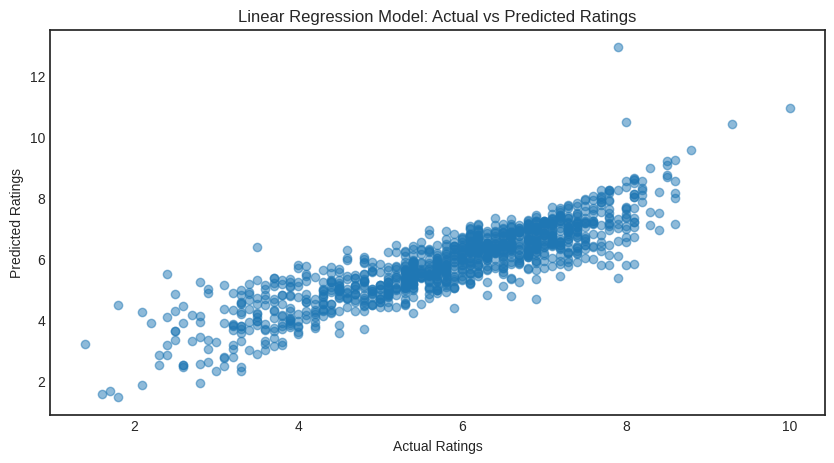

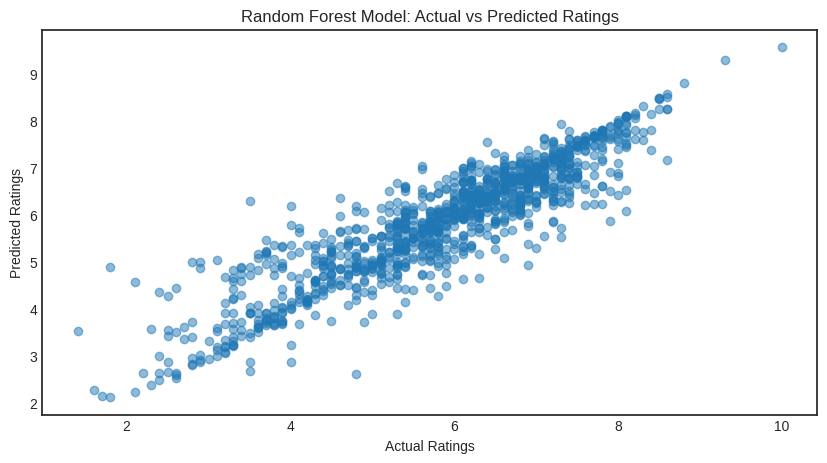

In [58]:
# Evaluating the model's performance and creating scatter plots

# Imports
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Convert 'Year' column to numeric, handling errors
df['Year'] = df['Year'].astype(str).str.replace(r'\(|\)', '', regex=True)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Year'].fillna(df['Year'].mean(), inplace=True)

# Define feature and target variables
x = df[['Year', 'Votes', 'Duration', 'Genre_Average_Rating', 'Director_Average_Rating', 'Actor1_Average_Rating', 'Actor2_Average_Rating', 'Actor3_Average_Rating']]
y = df['Rating']

# Re-split the data after cleaning the 'Year' column
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
train_data = x_train.join(y_train)

# Ensure x_train contains only numeric features
x_train = train_data[['Year', 'Votes', 'Duration', 'Genre_Average_Rating', 'Director_Average_Rating', 'Actor1_Average_Rating', 'Actor2_Average_Rating', 'Actor3_Average_Rating']]
# Ensure y_train contains the target variable
y_train = train_data['Rating']

# Create and fit the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(x_test)

# Create and fit the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(x_test)

# Performance Evaluation for Linear Regression Model
MSE_lr = mean_squared_error(y_test, y_pred_lr)
MAE_lr = mean_absolute_error(y_test, y_pred_lr)
R2_Score_lr = r2_score(y_test, y_pred_lr)

print('   Performance Evaluation for Linear Regression Model: ')
print('Mean squared error value is: ', MSE_lr)
print('Mean absolute error value is: ', MAE_lr)
print('R2 score value is: ', R2_Score_lr)

# Performance Evaluation for Random Forest Model
MSE_rf = mean_squared_error(y_test, y_pred_rf)
MAE_rf = mean_absolute_error(y_test, y_pred_rf)
R2_Score_rf = r2_score(y_test, y_pred_rf)

print('\n   Performance Evaluation for Random Forest Model: ')
print('Mean squared error value is: ', MSE_rf)
print('Mean absolute error value is: ', MAE_rf)
print('R2 score value is: ', R2_Score_rf)

# Scatter plot for Linear Regression model predictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.title('Linear Regression Model: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

# Scatter plot for Random Forest model predictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.title('Random Forest Model: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

model testing


In [59]:
x.head(10)

,Year,Votes,Duration,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating
1,2019,8,109,6.352082,7.000000,6.850000,7.000000,7.000000
3,2019,35,110,5.722500,4.400000,5.420000,4.400000,4.450000
5,1997,827,147,6.224490,5.358824,4.788889,5.786667,5.846154
6,2005,1086,142,6.820000,7.500000,5.356000,6.050000,6.500000
8,2012,326,82,5.463636,5.600000,5.600000,5.883333,5.600000
9,2014,11,116,5.274074,4.000000,4.000000,4.550000,4.000000
10,2004,17,96,6.352082,6.200000,5.235294,5.361538,5.233333
11,2016,59,120,4.635659,6.950000,5.780000,5.900000,5.900000
12,1991,983,161,5.400000,4.790000,5.123636,5.759259,5.164286
13,2012,512,166,5.739906,5.700000,6.300000,5.700000,5.700000


In [ ]:
y.head(10)

,Rating
1,7.0
3,4.4
5,4.7
6,7.4
8,5.6
9,4.0
10,6.2
11,5.9
12,6.5
13,5.7


In [63]:
# Create new trial dataframe to testing

data = {'Year': [2018], 'Votes': [100] ,'Duration': [130], 'Genre_Average_Rating':[6.0],'Director_Average_Rating':[6.5],'Actor1_Average_Rating':[5.5],'Actor2_Average_Rating':[5.8],'Actor3_Average_Rating':[5.3]}
trail_data = pd.DataFrame(data)

# Assign the trained Random Forest model to fitted_model_rf
fitted_model_rf = rf_model  # Assuming 'rf_model' is your trained Random Forest model

predict_rating = fitted_model_rf.predict(trail_data)
print('Predicted Rating for trial data: ',predict_rating[0])

Predicted Rating for trial data:  5.922999999999999
